# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fort st. john
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | qaqortoq
Processing Record 4 of Set 1 | muynoq
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | keflavik
Processing Record 10 of Set 1 | barra de santo antonio
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | namtsy
Processing Record 14 of Set 1 | road town
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | port douglas
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | taltal
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | guerrero negro
Processin

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

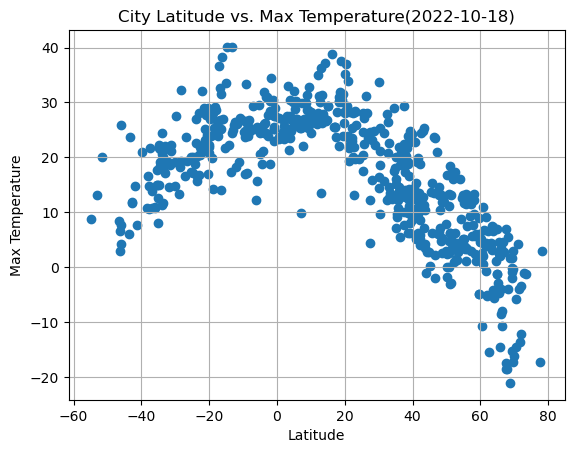

In [56]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

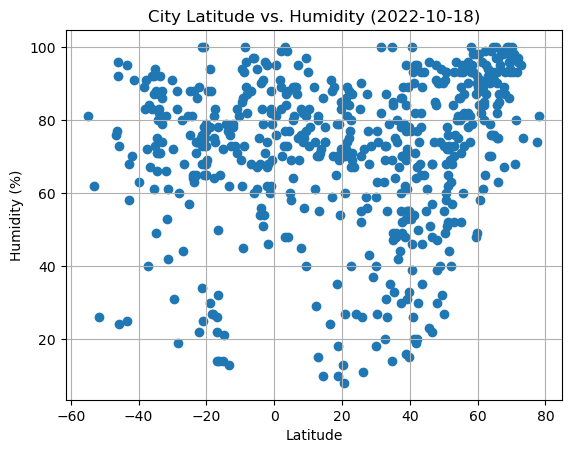

In [54]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

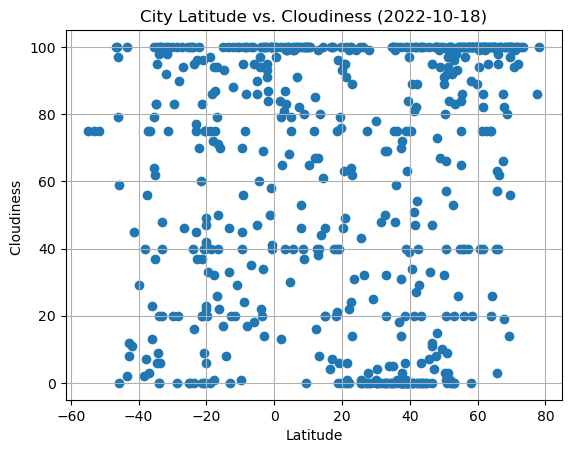

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness ")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

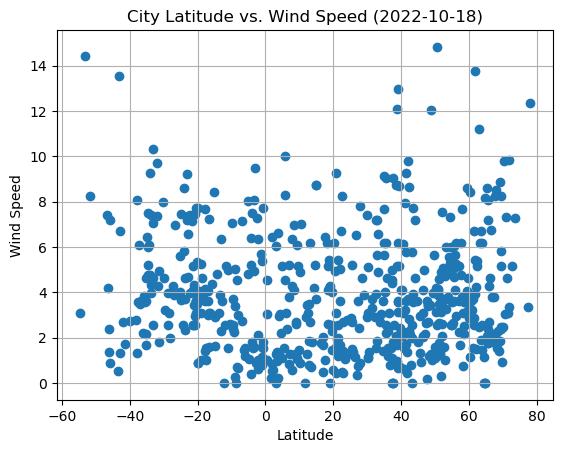

In [59]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    

    regress_values = x_values * slope + intercept
    
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

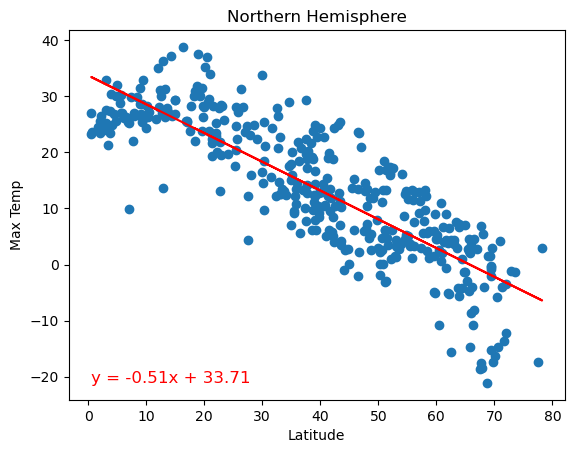

In [38]:
# Linear regression on Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_temperature_northern = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_temperature_northern)

regress_values_northern = x_values_northern * slope + intercept

line_eq_northern = f"y = {round(slope, 2)}x + {round(intercept, 2)}"


plt.scatter(x_values_northern, y_values_temperature_northern)

plt.plot(x_values_northern, regress_values_northern, "r-")

plt.annotate(line_eq_northern, (min(x_values_northern), min(y_values_temperature_northern)), fontsize=12, color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere")

plt.show()

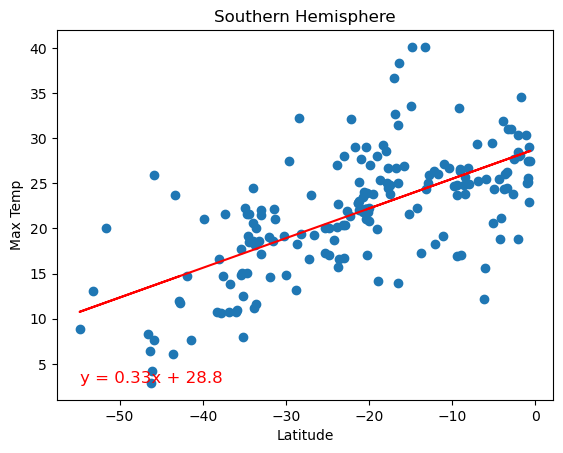

The r-value is: 0.64


In [42]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_temperature_southern = southern_hemi_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_temperature_southern)

regress_values_southern = x_values_southern * slope + intercept

line_eq_southern = f"y = {round(slope, 2)}x + {round(intercept, 2)}"


plt.scatter(x_values_southern, y_values_temperature_southern)
plt.annotate(line_eq_southern, (min(x_values_southern), min(y_values_temperature_southern)), fontsize=12, color="red")

plt.plot(x_values_southern, regress_values_southern, "r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere")


plt.show()


print(f"The r-value is: {round(rvalue, 2)}")

**Discussion about the linear relationship:The r-value of 0.64 is positive, suggesting a moderately strong positive correlation between Max Temp and latitude in the Southern Hemisphere. As one variable increases,the other variable tends to increase.

### Humidity vs. Latitude Linear Regression Plot

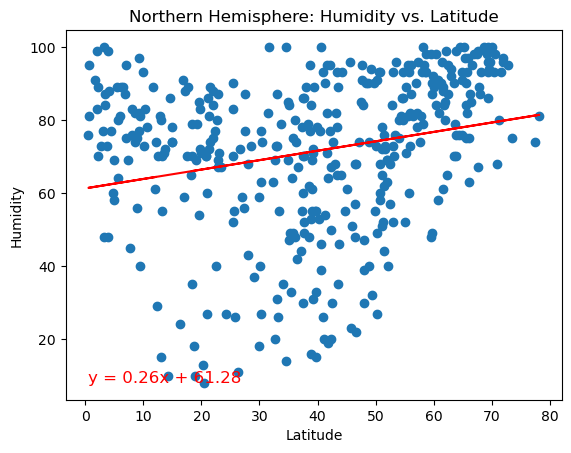

The r-value is: 0.23853179129394048


In [46]:
# Northern Hemisphere
x_values_northern_humidity = northern_hemi_df["Lat"]
y_values_humidity_northern = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern_humidity, y_values_humidity_northern)

regress_values_northern_humidity = x_values_northern_humidity * slope + intercept


line_eq_northern_humidity = f"y = {round(slope, 2)}x + {round(intercept, 2)}"


plt.scatter(x_values_northern_humidity, y_values_humidity_northern)

plt.plot(x_values_northern_humidity, regress_values_northern_humidity, "r-")

plt.annotate(line_eq_northern_humidity, (min(x_values_northern_humidity), min(y_values_humidity_northern)), fontsize=12, color="red")


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere: Humidity vs. Latitude")

# Show the plot
plt.show()

# Display the r-value
print(f"The r-value is: {rvalue}")

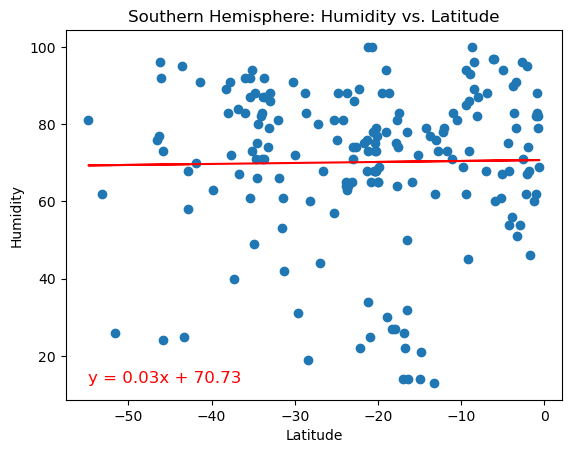

The r-value is: 0.016759316950056783


In [45]:
# Southern Hemisphere
x_values_southern_humidity = southern_hemi_df["Lat"]
y_values_humidity_southern = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern_humidity, y_values_humidity_southern)

regress_values_southern_humidity = x_values_southern_humidity * slope + intercept

line_eq_southern_humidity = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values_southern_humidity, y_values_humidity_southern)

plt.plot(x_values_southern_humidity, regress_values_southern_humidity, "r-")

plt.annotate(line_eq_southern_humidity, (min(x_values_southern_humidity), min(y_values_humidity_southern)), fontsize=12, color="red")


# Set the labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere: Humidity vs. Latitude")

# Show the plot
plt.show()

# Display the r-value
print(f"The r-value is: {rvalue}")


**Discussion about the linear relationship:** The r-value is: 0.016759316950056783 this suggests that there is little to no linear relationship between Humidity and Latitude in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

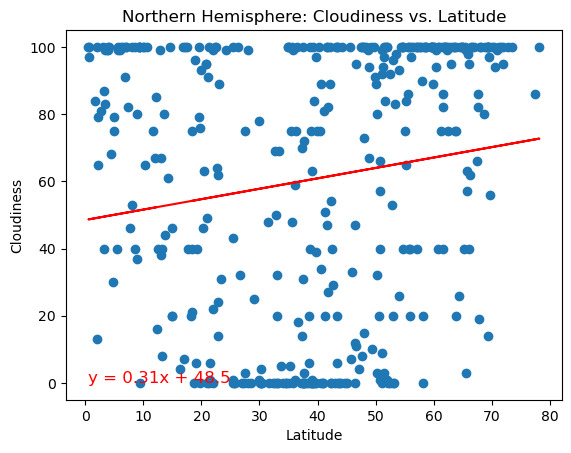

The r-value is: 0.15500489387697097


In [49]:
# Northern Hemisphere
x_values_northern_cloudiness = northern_hemi_df["Lat"]
y_values_cloudiness_northern = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern_cloudiness, y_values_cloudiness_northern)

regress_values_northern_cloudiness = x_values_northern_cloudiness * slope + intercept

line_eq_northern_cloudiness = f"y = {round(slope, 2)}x + {round(intercept, 2)}"


plt.scatter(x_values_northern_cloudiness, y_values_cloudiness_northern)

plt.plot(x_values_northern_cloudiness, regress_values_northern_cloudiness, "r-")

plt.annotate(line_eq_northern_cloudiness, (min(x_values_northern_cloudiness), min(y_values_cloudiness_northern)), fontsize=12, color="red")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")


plt.show()


print(f"The r-value is: {rvalue}")

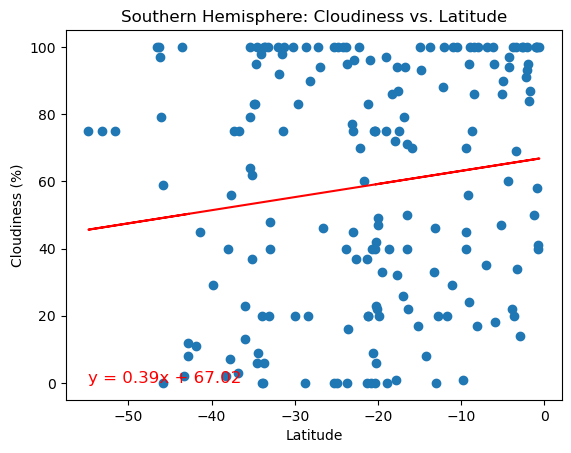

The r-value is: 0.14341322916643248


In [48]:
# Southern Hemisphere
x_values_southern_cloudiness = southern_hemi_df["Lat"]
y_values_cloudiness_southern = southern_hemi_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern_cloudiness, y_values_cloudiness_southern)


regress_values_southern_cloudiness = x_values_southern_cloudiness * slope + intercept


line_eq_southern_cloudiness = f"y = {round(slope, 2)}x + {round(intercept, 2)}"


plt.scatter(x_values_southern_cloudiness, y_values_cloudiness_southern)

plt.plot(x_values_southern_cloudiness, regress_values_southern_cloudiness, "r-")

plt.annotate(line_eq_southern_cloudiness, (min(x_values_southern_cloudiness), min(y_values_cloudiness_southern)), fontsize=12, color="red")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")


plt.show()

# Display the r-value
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** The r-value is: 0.14341322916643248 suggests a very weak positive correlation. While there is some tendency for the variables to move in the same direction, the strength of this relationship is minimal.

### Wind Speed vs. Latitude Linear Regression Plot

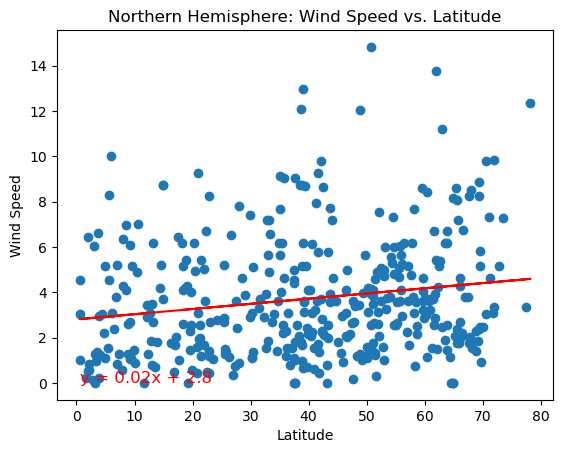

The r-value is: 0.17434667290903338


In [50]:
# Northern Hemisphere
x_values_northern_Windspeed = northern_hemi_df["Lat"]
y_values_Windspeed_northern = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern_Windspeed, y_values_Windspeed_northern)

regress_values_northern_Windspeed = x_values_northern_Windspeed * slope + intercept

line_eq_northern_Windspeed = f"y = {round(slope, 2)}x + {round(intercept, 2)}"


plt.scatter(x_values_northern_Windspeed, y_values_Windspeed_northern)

plt.plot(x_values_northern_Windspeed, regress_values_northern_Windspeed, "r-")

plt.annotate(line_eq_northern_Windspeed, (min(x_values_northern_Windspeed), min(y_values_Windspeed_northern)), fontsize=12, color="red")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")


plt.show()


print(f"The r-value is: {rvalue}")

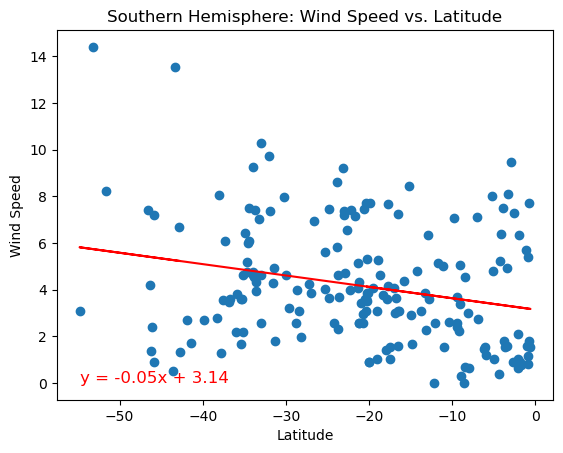

The r-value is: -0.24947753546264592


In [53]:
# Southern Hemisphere
x_values_southern_wind = southern_hemi_df["Lat"]
y_values_wind_speed_southern = southern_hemi_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern_wind, y_values_wind_speed_southern)


regress_values_southern_wind = x_values_southern_wind * slope + intercept


line_eq_southern_wind = f"y = {round(slope, 2)}x + {round(intercept, 2)}"


plt.scatter(x_values_southern_wind, y_values_wind_speed_southern)

plt.plot(x_values_southern_wind, regress_values_southern_wind, "r-")

plt.annotate(line_eq_southern_wind, (min(x_values_southern_wind), min(y_values_wind_speed_southern)), fontsize=12, color="red")



plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")


plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:**  The r-value-0.2495 indicates a moderate negative correlation between wind speed and latitude.